In [1]:
import dysh

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
dir(dysh)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'all',
 'version']

In [4]:
print(dysh.__version__)

0.3.0b


In [3]:
from dysh.fits import GBTFITSLoad

In [4]:
fname = '/home/sdfits/TSCI_RYAN_16/TSCI_RYAN_16.raw.vegas/TSCI_RYAN_16.raw.vegas.A.fits'
sdf = GBTFITSLoad(fname)

/users/esmith/Git/dysh/src/dysh/fits/gbtfitsload.py:1644: UserWarning: No RADESYS specified.
  warnings.warn("No RADESYS specified.")


In [3]:
fname = '/home/sdfits/TRCO_231002_L/TRCO_231002_L.raw.vegas/TRCO_231002_L.raw.vegas.A.fits'
sdf = GBTFITSLoad(fname)

In [5]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,1,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
1,2,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
2,3,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
3,4,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
4,5,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0


In [6]:
tpscan = sdf.gettp(scan=3,plnum=0)

Exception: unbalanced calrows 0 != 16

In [13]:
tpscan = sdf.gettp(scan=13,plnum=0,calibrate=False)

In [62]:
sdf.calonoff_rows(3,ifnum=0,plnum=0,fdnum=0)['OFF']

16

In [65]:
onsource_calon_indices = sdf.calonoff_rows(3,ifnum=0,plnum=0,fdnum=0)['OFF']
onsource_calon_chunk = sdf.rawspectra(0,0)[onsource_calon_indices]
onsource_calon_data = np.mean(onsource_calon_chunk,axis=0)

In [68]:
plt.plot(onsource_calon_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),) 16 (16, 524288)
(array([0]),) 1 (1, 524288)


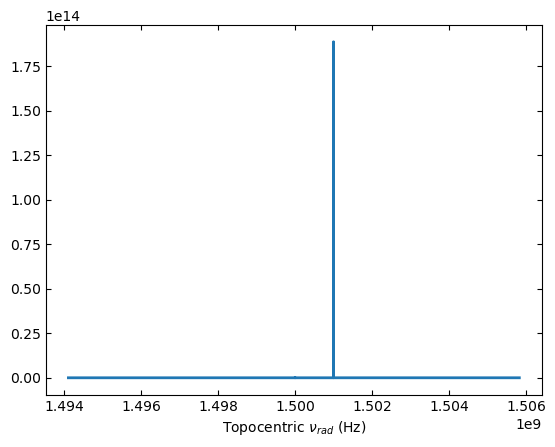

In [23]:
tpscan.timeaverage().plot()
#tpscan.timeaverage().plot(vel_frame='lsrk')

In [7]:
gwuh =tpscan.timeaverage().data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),) 12 (12, 16384)
(array([0]),) 1 (1, 16384)


In [8]:
gwuh

array([2.96928081e+08, 4.37253955e+04, 4.53163372e+04, ...,
       3.65272010e+04, 3.67463431e+04, 3.83974268e+04])

In [40]:
uhh.set_frame('itrs')

In [41]:
buh = (uhh.with_frame('lsrk'))

In [42]:
uhh.frequency

/users/esmith/.conda/envs/dyshpy/lib/python3.9/site-packages/astropy/units/equivalencies.py:559: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1 + beta) / (1 - beta)) - 1


<SpectralAxis 
   (observer: <ITRS Coordinate (obstime=J2000.000, location=(0., 0., 0.) km): (x, y, z) in m
                  (2.418883e+11, -9.14896264e+10, -1.10216068e+11)
               (v_x, v_y, v_z) in km / s
                  (-6671.54273465, -17638.77270587, -0.03090192)>
    target: <AltAz Coordinate (obstime=2024-05-21T19:12:24.010, location=(882593.9465029, -4924896.36541728, 3943748.74743984) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, kpc)
                (0., 0., 1000000.)
             (pm_az_cosalt, pm_alt, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>
    observer to target (computed from above):
      radial_velocity=-7778420.5 km / s
      redshift=nan
    doppler_rest=1500000000.0 Hz
    doppler_convention=radio)
  [1.50582623, 1.50582621, 1.50582619, ..., 1.49410757, 1.49410755,
   1.49410753] GHz>

In [43]:
buh.frequency

<SpectralAxis 
   (observer: <LSRK Coordinate: (x, y, z) in m
                  (-7.47734162e+10, -1.21901477e+11, -5.28073812e+10)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <AltAz Coordinate (obstime=2024-05-21T19:12:24.010, location=(882593.9465029, -4924896.36541728, 3943748.74743984) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, kpc)
                (0., 0., 1000000.)
             (pm_az_cosalt, pm_alt, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>
    observer to target (computed from above):
      radial_velocity=-7778398.0 km / s
      redshift=nan
    doppler_rest=1500000000.0 Hz
    doppler_convention=radio)
  [1.50571071, 1.50571069, 1.50571067, ..., 1.49399295, 1.49399293,
   1.4939929 ] GHz>

In [58]:
uhh

/users/esmith/.conda/envs/dyshpy/lib/python3.9/site-packages/astropy/units/equivalencies.py:559: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1 + beta) / (1 - beta)) - 1


<Spectrum1D(flux=[1708977.5548702665 ... 1854707.1426152117] ct (shape=(524288,), mean=722928570.49487 ct); spectral_axis=<SpectralAxis 
   (observer: <ITRS Coordinate (obstime=2024-05-21T19:12:24.010, location=(0., 0., 0.) km): (x, y, z) in m
                  (882593.9465029, -4924896.36541728, 3943748.74743984)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <SkyCoord (AltAz: obstime=2024-05-21T19:12:24.010, location=(882593.9465029, -4924896.36541728, 3943748.74743984) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, kpc)
                (0., 0., 1000000.)
             (pm_az_cosalt, pm_alt, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>
    observer to target (computed from above):
      radial_velocity=-7778421.0 km / s
      redshift=nan
    doppler_rest=1500000000.0 Hz
    doppler_convention=radio)
  [1.50582875e+09 1.50582872e+09 1.5058287

In [45]:
tpscan

ScanBlock([<dysh.spectra.scan.TPScan at 0x7f1585975b80>])

In [46]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,1,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
1,2,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
2,3,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
3,4,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0
4,5,B0329+54,0.0,Track,1,1.5,1.5,1,2,16,1,0.0,0.0


In [52]:
for i in range(len(sdf.index().iloc[0])):
    print(sdf.index().iloc[0][i])

B0329+54
11718750.0
2024-05-21T19:12:24.01
0.9842635
0.6263493895530701
1.0
(524288,1,1,1)
Counts
FREQ-OBS
1499969370.663166
262145.0
-22.351741790771484
AZ
0.0
EL
0.0
-5
Ryan Lynch
unknown
1
Track:NONE:TPWCAL
Rcvr1_2
1.5164986
RADI-OBS
0.0
0.0
1499969370.663166
0.0
0.0
0.0
0.0
0.0
0.0
1500000000.0
22.35174179077148
0.0
AltAz
0.0
0.0
A1_0
1
0
0.0
0.0
1
L
1
1
ON
SIMPLE
1
0
2024_05_21_19:12:23
nan
nan
-1

0.0
nan
1500000000.0
1500000000.0
1048576.0000000002
10.66796875
262140.0
T
F
LOW
nan
nan
Unknown
0
1
0
1
0
0
0.0
Track
NONE
TPWCAL


In [53]:
print(sdf.index().iloc[0])

OBJECT                       B0329+54
BANDWID                    11718750.0
DATE-OBS       2024-05-21T19:12:24.01
DURATION                     0.984263
EXPOSURE                     0.626349
                        ...          
ROW                                 0
FITSINDEX                         0.0
PROC                            Track
_OBSTYPE                         NONE
_SUBOBSMODE                    TPWCAL
Name: 0, Length: 80, dtype: object
